# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
% matplotlib inline

Pretty printing has been turned OFF


In [ ]:
%pprint

##### 1. What does the data describe?

Based on the README file, the data gives the mean SAT math and verbal scores, and the participation rate for each US state and the District of Columbia for the year 2001.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

There are no obvious issues with the observations.

##### 3. Create a data dictionary for the dataset.

State: String, 2 letter code representing a US state  
Rate: Int, participation rate for the state in percentages  
Verbal: Int, mean verbal scores for the state  
Math: Int, mean math scores for the state  

In [2]:
data_d = pd.DataFrame([['State','Rate','Verbal','Math'],
['String', 'Integer','Integer','Integer'],
['2 letter code representing a US State*', 'Participation rate in a state, in percentage',
'Mean Verbal scores in a state', 'Mean Math scores in a state']], index=['Name', 'Data type', 'Description']).T
data_d

,Name,Data type,Description
0,State,String,2 letter code representing a US State*
1,Rate,Integer,"Participation rate in a state, in percentage"
2,Verbal,Integer,Mean Verbal scores in a state
3,Math,Integer,Mean Math scores in a state


\* Includes the Federal District of Columbia

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [3]:
data = []
with open('../assets/sat_scores.csv', 'rU') as f:
    raw_data = csv.reader(f)
    for row in raw_data:
        data.append(row)

##### 5. Print the data

In [4]:
print data

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

In [5]:
# reading the data into a pandas dataframe

df = pd.read_csv('../assets/sat_scores.csv')
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


##### 6. Extract a list of the labels from the data, and remove them from the data.

In [6]:
labels = data.pop(0)
labels

['State', 'Rate', 'Verbal', 'Math']

In [7]:
data

[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12', '550', '550'], ['WY', '11', '547',

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [8]:
states = [x[0] for x in data]
states

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']

In [10]:
# retrieving State names using the pandas dataframe
df.State.head()

0    CT
1    NJ
2    MA
3    NY
4    NH
Name: State, dtype: object

##### 8. Print the types of each column

In [14]:
[type(x) for x in data[0]]

[<type 'str'>, <type 'str'>, <type 'str'>, <type 'str'>]

In [20]:
# getting the types of each column in the dataframe
# when the data was read into the dataframe, the numbers had already been converted to integers
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [21]:
format_data = [[x[0], int(x[1]), int(x[2]), int(x[3])] for x in data]

In [22]:
format_data

[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NE', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], ['WI', 6, 584, 596], ['AR', 6, 562, 55

In [23]:
# when the data was read into the dataframe, the numbers had already been converted to integers
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [24]:
d_rate = {x[0]: x[1] for x in format_data}
d_rate

{'WA': 53, 'DE': 67, 'DC': 56, 'WI': 6, 'WV': 18, 'HI': 52, 'FL': 54, 'WY': 11, 'NH': 72, 'NJ': 81, 'NM': 13, 'TX': 53, 'LA': 7, 'NC': 65, 'ND': 4, 'NE': 8, 'TN': 13, 'NY': 77, 'PA': 71, 'RI': 71, 'NV': 33, 'VA': 68, 'CO': 31, 'AK': 51, 'AL': 9, 'AR': 6, 'VT': 69, 'IL': 12, 'GA': 63, 'IN': 60, 'IA': 5, 'OK': 8, 'AZ': 34, 'CA': 51, 'ID': 17, 'CT': 82, 'ME': 69, 'MD': 65, 'All': 45, 'MA': 79, 'OH': 26, 'UT': 5, 'MO': 8, 'MN': 9, 'MI': 11, 'KS': 9, 'MT': 23, 'MS': 4, 'SC': 57, 'KY': 12, 'OR': 55, 'SD': 4}

In [25]:
d_verb = {x[0]: x[2] for x in format_data}
d_verb

{'WA': 527, 'DE': 501, 'DC': 482, 'WI': 584, 'WV': 527, 'HI': 485, 'FL': 498, 'WY': 547, 'NH': 520, 'NJ': 499, 'NM': 551, 'TX': 493, 'LA': 564, 'NC': 493, 'ND': 592, 'NE': 562, 'TN': 562, 'NY': 495, 'PA': 500, 'RI': 501, 'NV': 509, 'VA': 510, 'CO': 539, 'AK': 514, 'AL': 559, 'AR': 562, 'VT': 511, 'IL': 576, 'GA': 491, 'IN': 499, 'IA': 593, 'OK': 567, 'AZ': 523, 'CA': 498, 'ID': 543, 'CT': 509, 'ME': 506, 'MD': 508, 'All': 506, 'MA': 511, 'OH': 534, 'UT': 575, 'MO': 577, 'MN': 580, 'MI': 561, 'KS': 577, 'MT': 539, 'MS': 566, 'SC': 486, 'KY': 550, 'OR': 526, 'SD': 577}

In [26]:
d_math = {x[0]: x[3] for x in format_data}
d_math

{'WA': 527, 'DE': 499, 'DC': 474, 'WI': 596, 'WV': 512, 'HI': 515, 'FL': 499, 'WY': 545, 'NH': 516, 'NJ': 513, 'NM': 542, 'TX': 499, 'LA': 562, 'NC': 499, 'ND': 599, 'NE': 568, 'TN': 553, 'NY': 505, 'PA': 499, 'RI': 499, 'NV': 515, 'VA': 501, 'CO': 542, 'AK': 510, 'AL': 554, 'AR': 550, 'VT': 506, 'IL': 589, 'GA': 489, 'IN': 501, 'IA': 603, 'OK': 561, 'AZ': 525, 'CA': 517, 'ID': 542, 'CT': 510, 'ME': 500, 'MD': 510, 'All': 514, 'MA': 515, 'OH': 439, 'UT': 570, 'MO': 577, 'MN': 589, 'MI': 572, 'KS': 580, 'MT': 539, 'MS': 551, 'SC': 488, 'KY': 550, 'OR': 526, 'SD': 582}

##### 11. Create a dictionary with the values for each of the numeric columns

In [27]:
num_dict = {k:[v[labels.index(k)] for v in format_data] for k in labels[1:]}

In [28]:
num_dict

{'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506]}

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [41]:
print 'Max Rate: {}'.format(max(num_dict['Rate']))
print 'Min Rate: {}'.format(min(num_dict['Rate']))

Max Rate: 82
Min Rate: 4


In [40]:
print 'Max Verbal: {}'.format(max(num_dict['Verbal']))
print 'Min Verbal: {}'.format(min(num_dict['Verbal']))

Max Verbal: 593
Min Verbal: 482


In [39]:
print 'Max Math: {}'.format(max(num_dict['Math']))
print 'Min Math: {}'.format(min(num_dict['Math']))

Max Math: 603
Min Math: 439


In [38]:
# using pandas, the dataframe's describe() function includes the min and max of each numerical column
df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [42]:
def std_dev(lst):
    num = float(len(lst))
    mean_col = sum(lst)/num
    var = sum([(x-mean_col)**2 for x in lst])/num
    return var**0.5

In [43]:
print 'Standard deviation'
print 'Rate: {}'.format(std_dev(num_dict['Rate']))
print 'Verbal: {}'.format(std_dev(num_dict['Verbal']))
print 'Math: {}'.format(std_dev(num_dict['Math']))

Standard deviation
Rate: 27.0379964945
Verbal: 32.9150949616
Math: 35.6669961643


In [44]:
print 'Standard deviation (for checking)'
print 'Rate: {}'.format(np.std(num_dict['Rate']))
print 'Verbal: {}'.format(np.std(num_dict['Verbal']))
print 'Math: {}'.format(np.std(num_dict['Math']))

Standard deviation (for checking)
Rate: 27.0379964945
Verbal: 32.9150949616
Math: 35.6669961643


In [45]:
print 'Standard deviation (for checking)'
df.std()

Standard deviation (for checking)


Rate      27.301788
Verbal    33.236225
Math      36.014975
dtype: float64

Note: Standard deviation from pandas differs from numpy and manual calculations. Based on a search, it seems that pandas uses an unbiased estimator (with (N-1) in the denominator instead of N), hence the differences.

## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

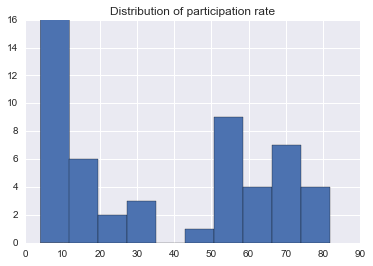

In [47]:
_ = plt.hist(num_dict['Rate'])
_ = plt.title('Distribution of participation rate')

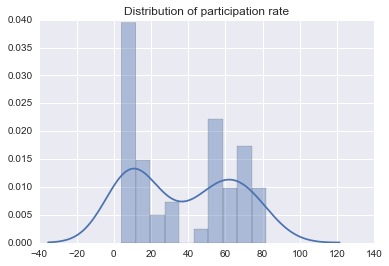

In [48]:
x = sns.distplot(num_dict['Rate'], bins=10)
_ = x.set_title('Distribution of participation rate')

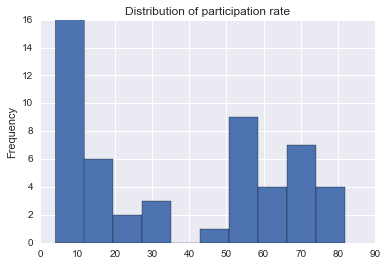

In [49]:
_ = df.Rate.plot('hist', title='Distribution of participation rate')

##### 15. Plot the Math distribution

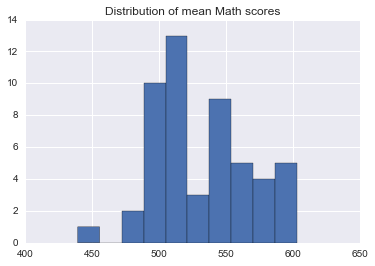

In [50]:
_ = plt.hist(num_dict['Math'])
_ = plt.title('Distribution of mean Math scores')

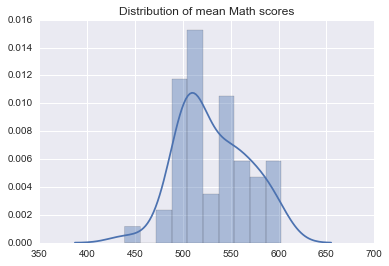

In [51]:
y = sns.distplot(num_dict['Math'], bins=10)
_ = y.set_title('Distribution of mean Math scores')

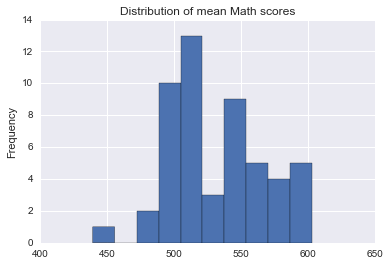

In [52]:
_ = df.Math.plot('hist', title='Distribution of mean Math scores')

##### 16. Plot the Verbal distribution

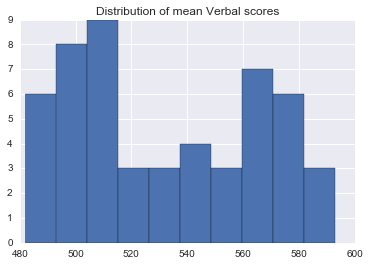

In [53]:
_ = plt.hist(num_dict['Verbal'])
_ = plt.title('Distribution of mean Verbal scores')

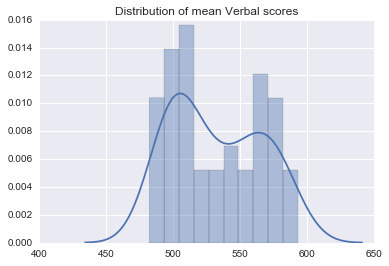

In [54]:
z = sns.distplot(num_dict['Verbal'], bins=10)
_ = z.set_title('Distribution of mean Verbal scores')

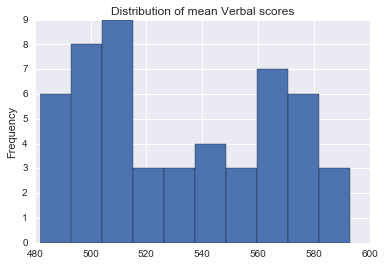

In [55]:
_ = df.Verbal.plot('hist', title='Distribution of mean Verbal scores')

##### 17. What is the typical assumption for data distribution?

It is typically assumed that data is normally distributed.

##### 18. Does that distribution hold true for our data?

No

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

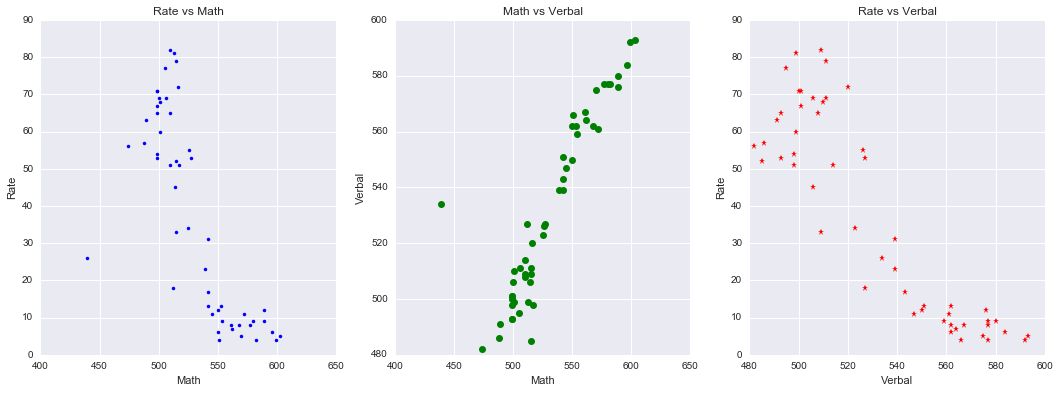

In [57]:
fig, axs = plt.subplots(1,3, figsize=(18,6))

_ = axs[0].plot(num_dict['Math'], num_dict['Rate'], 'b.')
_ = axs[0].set_title('Rate vs Math')
_ = axs[0].set_ylabel('Rate')
_ = axs[0].set_xlabel('Math')
_ = axs[1].plot(num_dict['Math'], num_dict['Verbal'], 'go')
_ = axs[1].set_title('Math vs Verbal')
_ = axs[1].set_ylabel('Verbal')
_ = axs[1].set_xlabel('Math')
_ = axs[2].plot(num_dict['Verbal'], num_dict['Rate'], 'r*')
_ = axs[2].set_title('Rate vs Verbal')
_ = axs[2].set_ylabel('Rate')
_ = axs[2].set_xlabel('Verbal')

##### 20. Are there any interesting relationships to note?

Math and Verbal seem to be positively correlated (as one increases, the other also increases).  
  
Rate seems to be negatively correlated to both Math and Verbal (as rate increases, the other two decrease, and vice versa).  
i.e. The less people in a state that take the SAT, the higher the mean scores for said state tend to be.

##### 21. Create box plots for each variable. 

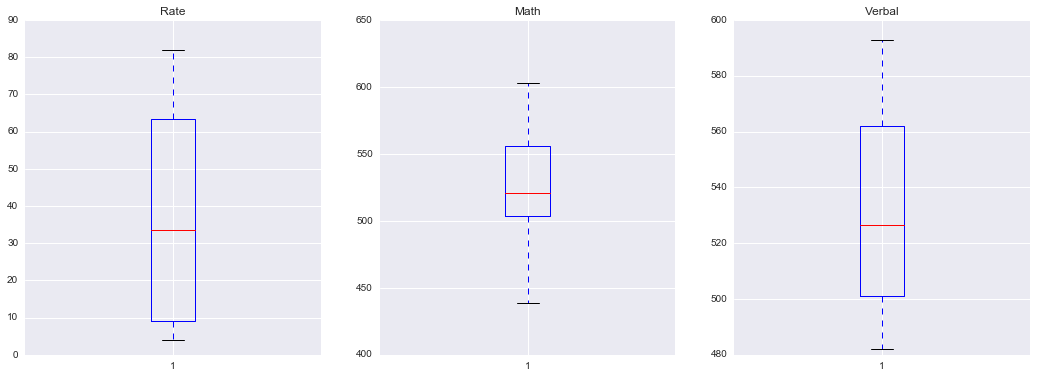

In [58]:
fig, axs = plt.subplots(1,3, figsize=(18,6))

_ = axs[0].boxplot(num_dict['Rate'])
axs[0].set_title('Rate')
_ = axs[1].boxplot(num_dict['Math'])
axs[1].set_title('Math')
_ = axs[2].boxplot(num_dict['Verbal'])
axs[2].set_title('Verbal')

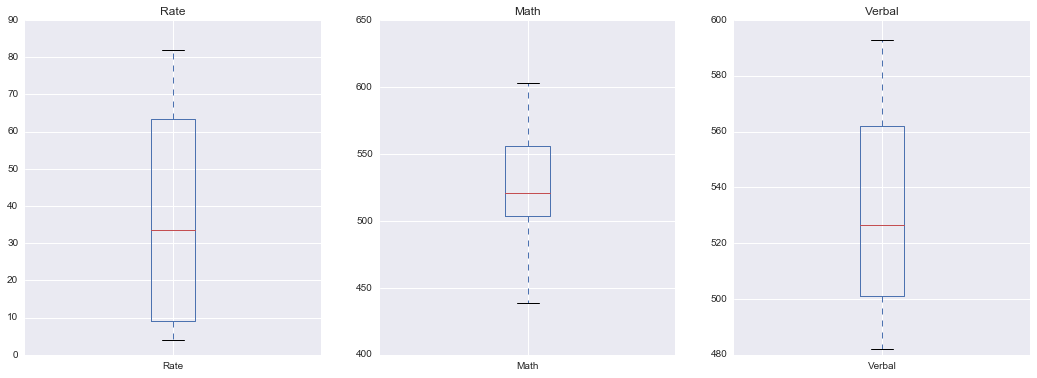

In [147]:
fig, axs = plt.subplots(1,3, figsize=(18,6))
_ = df.Rate.plot('box', axs[0], title='Rate')
_ = df.Math.plot('box', axs[1], title="Math")
_ = df.Verbal.plot('box', axs[2], title='Verbal')

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

<img src='Rate.png'>

<img src='Math.png'>

<img src='Verbal.png'>